# Portal da Transparência de Barueri
## Definição: 

O Portal da Transparência de Barueri é uma ferramenta essencial para o exercício da cidadania e o controle social sobre os gastos e a gestão pública do município. Ele é uma exigência da Lei de Acesso à Informação (Lei nº 12.527/2011 - LAI), que garante a qualquer pessoa o direito de solicitar e receber informações públicas dos órgãos e entidades de todos os níveis de governo.

Em resumo, o Portal da Transparência de Barueri (e de qualquer outra cidade, estado ou esfera federal) tem como principal objetivo:

Promover a Transparência Ativa: Divulgar proativamente informações de interesse público, sem a necessidade de solicitação prévia do cidadão. Isso inclui dados sobre:

#### Receitas e Despesas: 
Detalhamento de onde o dinheiro público vem e para onde vai.

#### Salários de Servidores: 
Remuneração de funcionários públicos (com exceção de dados pessoais sensíveis).

#### Licitações e Contratos: 
Processos de compra de bens e serviços, com os nomes das empresas contratadas e os valores.

#### Convênios e Repasses:
Informações sobre acordos e transferências de recursos.

#### Leis e Atos Normativos: 
Legislação municipal.

#### Planos e Programas de Governo:
As ações e metas da administração municipal.

#### Dados Institucionais:
Estrutura organizacional, horários de atendimento, contatos, etc.

#### Facilitar o Acesso à Informação: 
Além da divulgação proativa, o portal geralmente oferece um "Serviço de Informações ao Cidadão (SIC)" eletrônico, onde os cidadãos podem fazer perguntas específicas e acompanhar o andamento de suas solicitações.

#### Fomentar o Controle Social: 
Ao disponibilizar essas informações, o portal permite que os cidadãos acompanhem e fiscalizem a gestão dos recursos públicos, cobrando responsabilidade e eficiência.

### Links dos portais a seguir:
##### https://www.barueri.sp.gov.br/Transparencia/Default.aspx
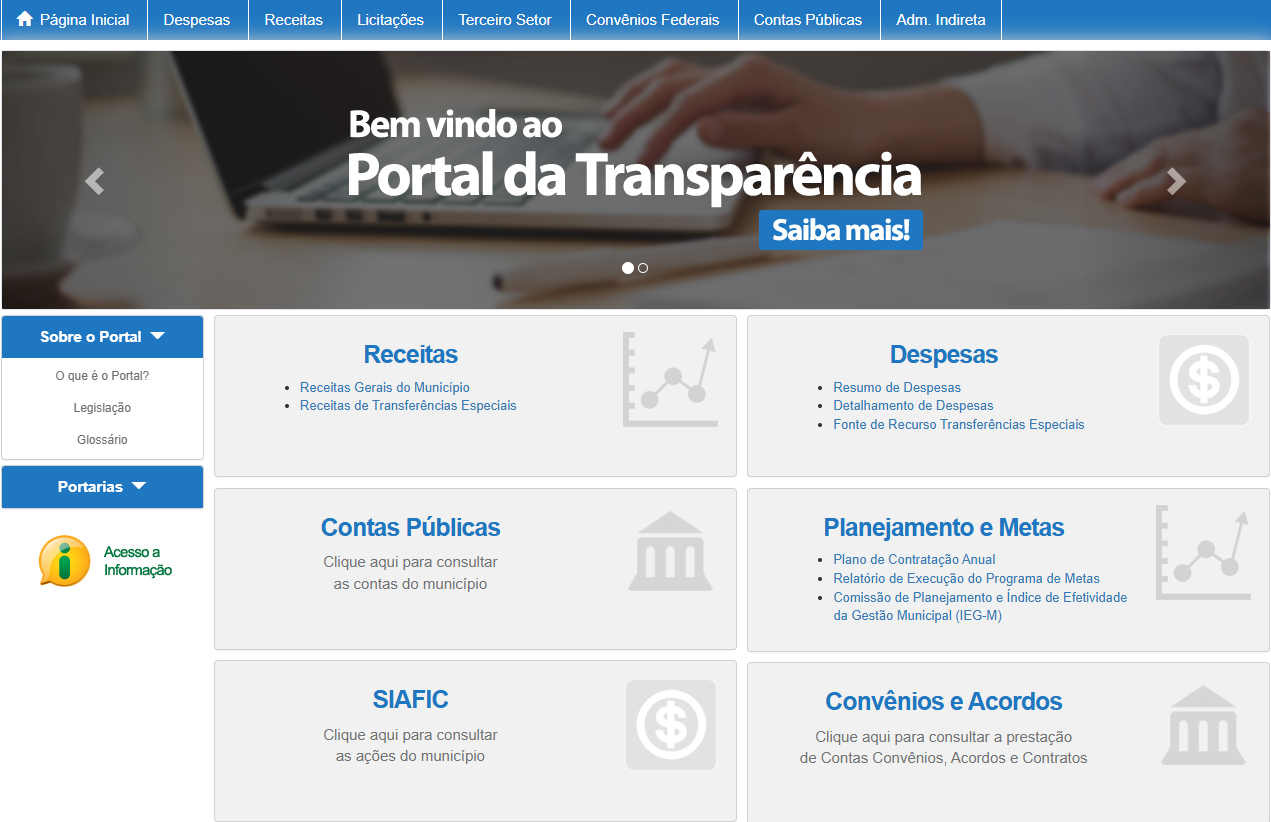

##### https://portal.barueri.sp.leg.br/PortaldaTransparencia/Shared/wfDashBoard.aspx
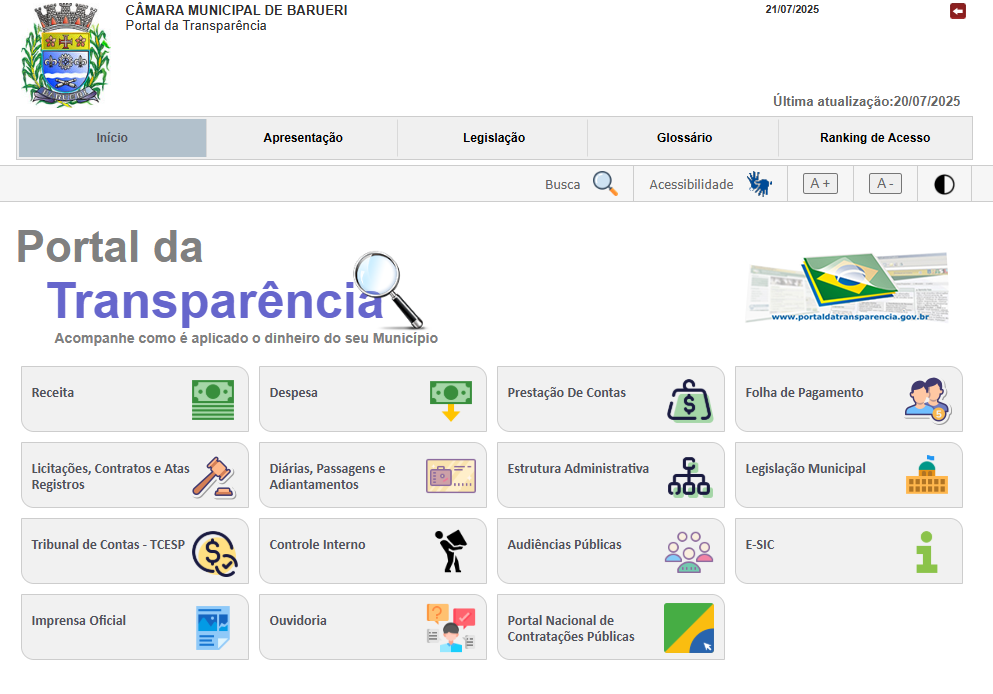

##### https://www.barueri.sp.leg.br/
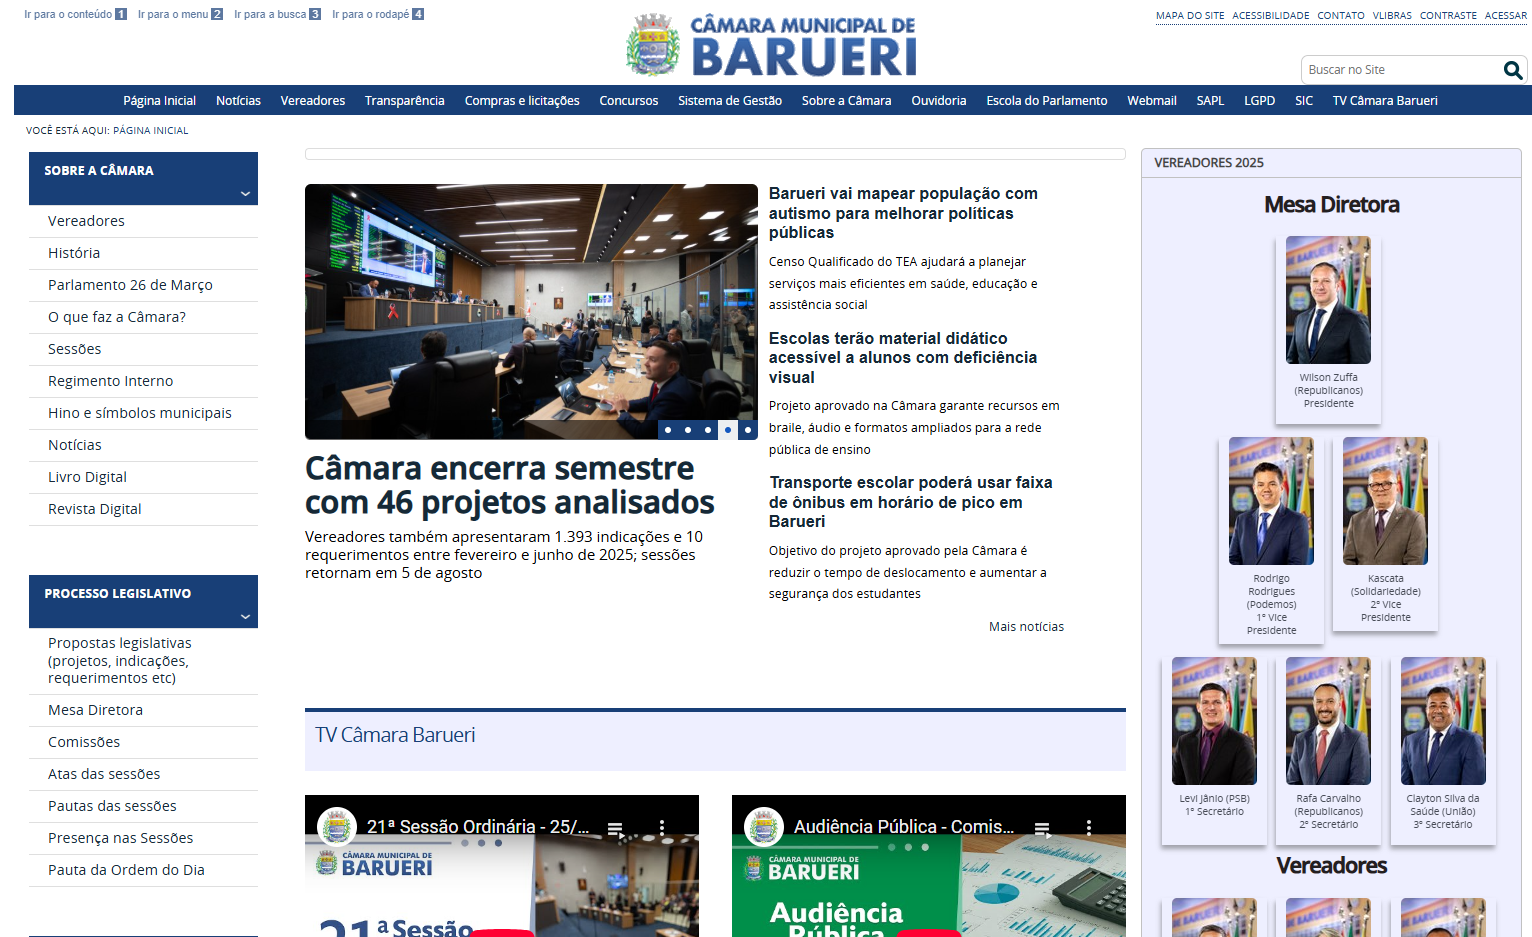

In [56]:
import os
import time
import glob
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException

# Caminho onde deseja salvar os arquivos
download_dir = os.path.join(os.path.expanduser("~"), "Downloads")
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Configurações do navegador
options = Options()
options.headless = False # Mantenha como False para depurar!
prefs = {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "directory_upgrade": True,
    "safeBrowse.enabled": True
}
options.add_experimental_option("prefs", prefs)

# Abre o Chrome
driver = webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 30)

try:
    # Acessa a página de RECEITAS
    driver.get("https://www.barueri.sp.gov.br/Transparencia/Receitas.aspx?np=1")

    # Aguarda e preenche o campo de ano
    ano_select_element = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_ddlAnoReceita")))
    ano_select = Select(ano_select_element)
    
    # Mês alvo e ano alvo para teste
    ano_alvo = "2015"
    mes_alvo = "AGOSTO" # Verifique se 'AGOSTO' existe para 2015 manualmente no site primeiro

    print(f"Tentando selecionar ano: {ano_alvo}")
    ano_select.select_by_visible_text(ano_alvo)
    print(f"Ano {ano_alvo} selecionado.")

    # --- NOVO TRECHO CRÍTICO: ESPERAR O DROPDOWN DO MÊS ATUALIZAR ---
    # Estratégia: Esperar até que a primeira opção do dropdown de mês não seja "TODOS"
    # ou que o dropdown de meses se torne clicável novamente após o ano ser selecionado.

    # Método 1: Re-localizar o elemento e esperar pela atualização das opções
    # CUIDADO: Este pode ser um StaleElementReferenceException se o DOM for muito refeito.
    # Alternativa mais robusta: Esperar por uma condição específica nas opções.

    # Vamos esperar explicitamente que as opções do mês sejam atualizadas.
    # Primeiro, pegamos a lista atual de opções APÓS a seleção do ano.
    # O ideal é esperar que a lista de opções mude ou que o elemento se torne clicável novamente.
    
    # Uma forma mais robusta é esperar que o elemento do mês se torne clicável novamente,
    # caso ele tenha ficado "stale" (obsoleto) durante a atualização do ano.
    print("Aguardando atualização do dropdown de meses...")
    # Tenta obter o elemento do mês repetidamente até que ele não seja stale ou esteja atualizado
    # Isso é um loop de espera personalizada
    timeout = 10 # segundos
    start_time = time.time()
    mes_select_element_ready = False
    while time.time() - start_time < timeout:
        try:
            mes_select_element = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_ddlMesReceita")))
            mes_select = Select(mes_select_element)
            # Apenas para testar se as opções já foram carregadas, tente acessar a primeira
            # Isso pode causar um StaleElementReferenceException se o elemento for recriado.
            # Uma verificação melhor é checar se as opções mudaram ou se o texto esperado está lá.
            
            # Uma forma mais simples é esperar que o número de opções seja maior que 1 (se "TODOS" for o único inicialmente)
            # Ou que a opção desejada esteja visível.
            
            # Vamos simplesmente esperar que o elemento esteja clicável novamente e dar um pequeno tempo.
            time.sleep(1) # Pequeno tempo para garantir que as opções se popularizem
            mes_select_element_ready = True
            break
        except (StaleElementReferenceException, TimeoutException):
            print("Elemento do mês ainda não pronto, aguardando...")
            time.sleep(0.5) # Espera um pouco antes de tentar novamente
    
    if not mes_select_element_ready:
        raise TimeoutException(f"Dropdown de meses não se tornou clicável ou não atualizou após {timeout} segundos para o ano {ano_alvo}.")

    print("Elemento do mês encontrado e pronto. Verificando opções...")

    # Re-obtém o objeto Select para garantir que está trabalhando com o elemento mais recente
    mes_select = Select(wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_ddlMesReceita"))))

    # Imprime todas as opções disponíveis no dropdown do mês para o ano selecionado
    opcoes_disponiveis = [option.text for option in mes_select.options]
    print(f"Opções disponíveis para o mês no ano {ano_alvo}: {opcoes_disponiveis}")

    if mes_alvo in opcoes_disponiveis:
        mes_select.select_by_visible_text(mes_alvo)
        print(f"Mês '{mes_alvo}' selecionado.")
    else:
        print(f"Atenção: Mês '{mes_alvo}' não encontrado nas opções disponíveis para o ano {ano_alvo}.")
        print("Tente novamente com uma opção listada acima.")
        # Se você ainda quer prosseguir, pode selecionar "TODOS" ou levantar um erro.
        mes_select.select_by_visible_text("TODOS")
        print("Selecionado 'TODOS' como fallback.")

    # Clica no botão "Consultar"
    consultar_btn = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_ibtnConsultarReceita")))
    consultar_btn.click()
    print("Botão 'Consultar' clicado.")

    # Aguarda os dados carregarem.
    print("Aguardando carregamento da tabela...")
    try:
        wait.until(EC.invisibility_of_element_located((By.ID, "waiting")))
        print("'waiting' sumiu.")
    except TimeoutException:
        print("Elemento 'waiting' não sumiu no tempo esperado ou não apareceu. Prosseguindo...")

    time.sleep(3) # Pequeno sleep adicional após o 'waiting' sumir para garantir que o DOM esteja estável

    # Clica no botão "Gerar Planilha"
    print("Tentando clicar no botão 'Gerar Planilha'...")
    gerar_btn = wait.until(EC.element_to_be_clickable((By.ID, "ctl00_ContentPlaceHolder1_btnGerarPlanilha")))
    gerar_btn.click()
    print("Botão 'Gerar Planilha' clicado. Aguardando download...")

    # --- Lógica para aguardar o download ---
    file_name = "Transparencia.csv"
    expected_file_path = os.path.join(download_dir, file_name)
    download_timeout = 60 # Tempo máximo para esperar o download em segundos
    start_time = time.time()
    download_complete = False

    while time.time() - start_time < download_timeout:
        if os.path.exists(expected_file_path):
            print(f"Arquivo '{file_name}' encontrado em {expected_file_path}")
            download_complete = True
            break
        crdownload_files = glob.glob(os.path.join(download_dir, '*.crdownload'))
        if crdownload_files:
            print(f"Download em andamento: {crdownload_files[0]}...")
        else:
            print("Nenhum arquivo .csv ou .crdownload encontrado. Pode ter falhado.")
        time.sleep(2)

    if download_complete:
        print(f"Download de '{file_name}' concluído com sucesso!")
    else:
        print(f"Erro: Download de '{file_name}' não foi concluído dentro do tempo limite.")
        driver.save_screenshot(os.path.join(download_dir, "download_failed_screenshot.png"))
        print(f"Captura de tela salva em {os.path.join(download_dir, 'download_failed_screenshot.png')}")

except NoSuchElementException as e:
    print(f"Erro: Elemento não encontrado. {e}")
    driver.save_screenshot(os.path.join(download_dir, "element_not_found_error_screenshot.png"))
    print(f"Captura de tela de erro salva em {os.path.join(download_dir, 'element_not_found_error_screenshot.png')}")
except TimeoutException as e:
    print(f"Erro de Timeout: Um elemento não apareceu ou não se tornou interativo no tempo esperado. {e}")
    driver.save_screenshot(os.path.join(download_dir, "timeout_error_screenshot.png"))
    print(f"Captura de tela de erro salva em {os.path.join(download_dir, 'timeout_error_screenshot.png')}")
except Exception as e:
    print(f"Ocorreu um erro inesperado durante a automação: {e}")
    driver.save_screenshot(os.path.join(download_dir, "automation_general_error_screenshot.png"))
    print(f"Captura de tela de erro salva em {os.path.join(download_dir, 'automation_general_error_screenshot.png')}")

finally:
    driver.quit()
    print("Navegador fechado.")

Tentando selecionar ano: 2015
Ano 2015 selecionado.
Aguardando atualização do dropdown de meses...
Elemento do mês encontrado e pronto. Verificando opções...
Opções disponíveis para o mês no ano 2015: ['TODOS', 'JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO', 'AGOSTO', 'SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO']
Mês 'AGOSTO' selecionado.
Botão 'Consultar' clicado.
Aguardando carregamento da tabela...
'waiting' sumiu.
Tentando clicar no botão 'Gerar Planilha'...
Botão 'Gerar Planilha' clicado. Aguardando download...
Arquivo 'Transparencia.csv' encontrado em C:\Users\DaviS\Downloads\Transparencia.csv
Download de 'Transparencia.csv' concluído com sucesso!
Navegador fechado.
